In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import re
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import spacy
import pickle
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load amazon_alexa.tsv
data1_path = "/content/drive/My Drive/Colab Notebooks/NLP Project/Trial&Error/amazon_alexa.tsv"
df = pd.read_csv(data1_path, sep='\t')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df.head()

rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1

In [3]:
# Calculate and add a new column 'Review_Length' to store the length of each review
df['Review_Length'] = df['verified_reviews'].apply(lambda x: len(str(x).split()))

# Display the updated DataFrame
df.head()

rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  Review_Length  
0                                      Love my Echo!         1              3  
1                                          Loved it!         1              2  
2  Sometimes while playing a game, you can answer...         1             38  
3  I have had a lot of fun with this thing. My 4 ...         1             34  
4                                              Music         1              1

In [4]:
rating_group_stats = df.groupby('rating').describe()
rating_group_stats

feedback                                    Review_Length             \
          count mean  std  min  25%  50%  75%  max         count       mean   
rating                                                                        
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0         161.0  36.167702   
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0          96.0  47.114583   
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0         152.0  39.460526   
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0         455.0  34.164835   
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0        2286.0  20.902887   

                                                 
              std  min   25%   50%   75%    max  
rating                                           
1       39.184378  0.0   7.0  23.0  50.0  230.0  
2       50.509170  0.0  15.0  32.0  59.0  307.0  
3       51.180227  0.0  10.0  26.0  50.0  355.0  
4       41.295290  0.0   7.0  19.0  48.0  262.0  
5       29.090385  0.0   5.0  12.0  27.0  526.0

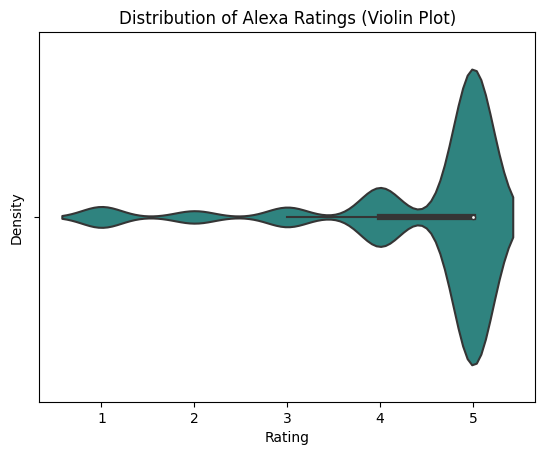

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Alexa Ratings (Violin Plot)')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()


In [6]:
import plotly.express as px

feedback = df['feedback'].value_counts()

fig = px.pie(feedback,
             values=feedback.values,
             names=feedback.index,
             title='Distribution of Feedback',
             hole=0.4)

fig.update_layout(height=700, width=500)

fig.show()


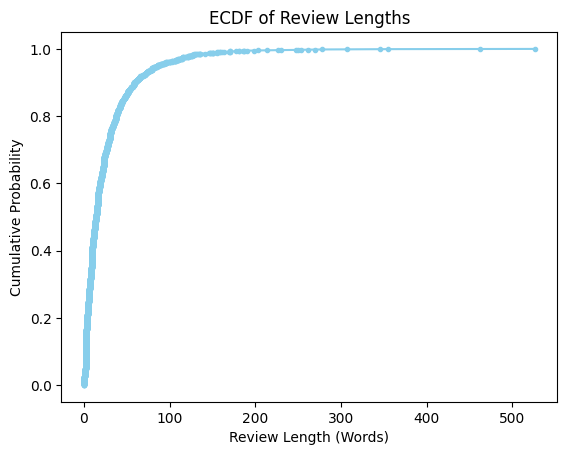

In [7]:
import matplotlib.pyplot as plt
import numpy as np

review_lengths = df['Review_Length']
sorted_lengths = np.sort(review_lengths)
cumulative_percentage = np.arange(1, len(sorted_lengths) + 1) / len(sorted_lengths)

plt.plot(sorted_lengths, cumulative_percentage, marker='.', linestyle='-', color='skyblue')
plt.xlabel('Review Length (Words)')
plt.ylabel('Cumulative Probability')
plt.title('ECDF of Review Lengths')
plt.show()


In [8]:
import plotly.express as px

reviews = px.histogram(df, x='Review_Length', color='feedback',
                       title='Distribution of Length of Reviews by Feedback',
                       labels={'Review_Length': 'Review Length', 'feedback': 'Feedback'})
reviews.show()


In [9]:
import plotly.express as px

rating_counts = df['rating'].value_counts()

# Create a pie chart
fig = px.pie(names=rating_counts.index, values=rating_counts.values,
             title='Distribution of Ratings', labels={'names': 'Rating'})

# Add a description to the figure
fig.update_layout(
    annotations=[
        dict(text='Pie chart showing the distribution of ratings',
             showarrow=False, x=0.5, y=-0.2, font=dict(size=14))
    ]
)

fig.show()


In [10]:
!pip install spacy
!pip install emoji



In [11]:
import spacy
import re
import emoji

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def preprocess_text(text):
    text = emoji.demojize(text)
    text = re.sub(r'[^\w\s]', '', text)
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.pos_ not in ['PUNCT', 'SPACE']]
    processed_text = ' '.join(tokens)
    return processed_text

def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])

df['processed_reviews'] = df['verified_reviews'].apply(preprocess_text)


In [12]:
df.head()

rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  Review_Length  \
0                                      Love my Echo!         1              3   
1                                          Loved it!         1              2   
2  Sometimes while playing a game, you can answer...         1             38   
3  I have had a lot of fun with this thing. My 4 ...         1             34   
4                                              Music         1              1   

                                   processed_reviews  
0                                          love echo  
1                                               love  
2  play game answer question correctly Alexa say ...  
3  lot fun thing 4 yr old learn dinosaur control ...  
4                                              music

In [13]:
import spacy
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

#Preprocessing
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
df['processed_reviews'] = df['verified_reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['processed_reviews'] = df['processed_reviews'].str.replace('[^\w\s]','')

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['processed_reviews'] = df['processed_reviews'].apply(lambda x: remove_emoji(x))

stop = stopwords.words('english')
df['processed_reviews'] = df['processed_reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

def lemmatize(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])

df['processed_reviews'] = df['processed_reviews'].apply(lemmatize)

# Display a sample of the processed reviews
print(df['processed_reviews'].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-13-2facd30a8970>:10: FutureWarning:

The default value of regex will change from True to False in a future version.



0                                            love echo
1                                                 love
2    sometimes play game answer question correctly ...
3    lot fun thing 4 yr old learn dinosaur control ...
4                                                music
Name: processed_reviews, dtype: object


In [14]:
df['SENTIMENT'] = df['rating'].apply(lambda x: 'POSITIVE' if x >= 4 else 'NEGATIVE')

# Display the DataFrame with the new 'SENTIMENT' column
print(df[['rating', 'SENTIMENT']].head())


   rating SENTIMENT
0       5  POSITIVE
1       5  POSITIVE
2       4  POSITIVE
3       5  POSITIVE
4       5  POSITIVE


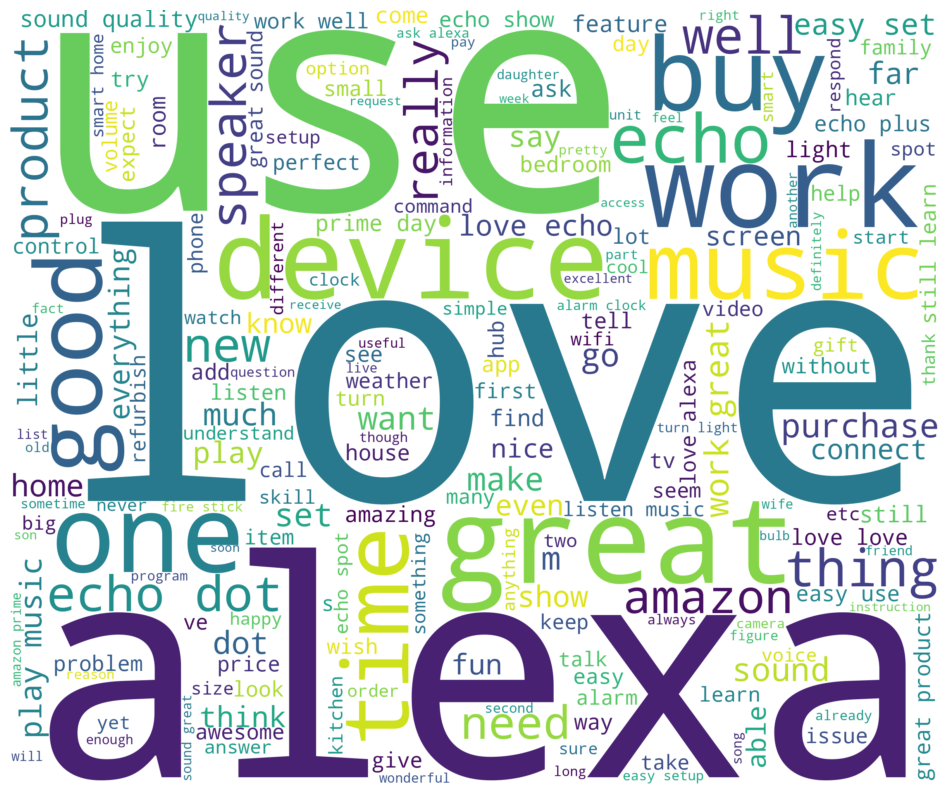

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

corpus_cloud = ' '.join(df['processed_reviews'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=2400, height=2000).generate(corpus_cloud)

plt.figure(figsize=(12, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
count_dict_reviews = {}

for doc in df['processed_reviews']:
    for word in doc.split():
        # Ignore words that are numbers
        if not word.isdigit():
            if word in count_dict_reviews:
                count_dict_reviews[word] += 1
            else:
                count_dict_reviews[word] = 1

# Remove words occurring less than 10 times
min_occurrence = 10
filtered_dict_reviews = {key: value for key, value in count_dict_reviews.items() if value >= min_occurrence}

# Create a list of lists for each document
list_of_lists = [doc.split() for doc in df['processed_reviews']]

# Print the word counts
for key, value in sorted(filtered_dict_reviews.items(), key=lambda item: item[1], reverse=True):
    print("%s: %s" % (key, value))


love: 1054
echo: 828
great: 727
use: 673
not: 670
work: 637
alexa: 594
like: 527
music: 524
get: 497
sound: 421
easy: 366
one: 364
do: 361
good: 341
well: 339
device: 338
set: 332
dot: 331
play: 320
buy: 316
speaker: 303
I: 280
product: 275
thing: 262
amazon: 255
time: 252
would: 238
m: 228
home: 219
still: 203
show: 201
really: 193
smart: 184
purchase: 177
new: 177
light: 176
ask: 173
day: 173
much: 172
need: 170
go: 169
make: 168
also: 168
prime: 167
quality: 166
learn: 157
want: 153
fun: 149
room: 149
far: 145
connect: 138
alarm: 135
even: 134
could: 132
say: 131
turn: 131
listen: 129
think: 123
can: 121
tv: 121
plus: 120
know: 119
everything: 119
tell: 118
screen: 117
house: 116
video: 114
app: 113
feature: 109
little: 109
see: 108
able: 107
look: 105
try: 105
weather: 102
voice: 102
spot: 102
nice: 100
add: 100
clock: 99
enjoy: 98
hub: 97
lot: 96
find: 94
price: 92
control: 91
come: 90
give: 88
phone: 88
many: 85
setup: 85
way: 83
another: 82
hear: 82
bedroom: 82
amazing: 82
witho

In [17]:
total_tokens = len(count_dict_reviews)
print("Total number of unique keys (tokens):", total_tokens)


Total number of unique keys (tokens): 3543


In [18]:
list_of_lists

[['love', 'echo'],
 ['love'],
 ['sometimes',
  'play',
  'game',
  'answer',
  'question',
  'correctly',
  'alexa',
  'say',
  'get',
  'wrong',
  'answer',
  'like',
  'able',
  'turn',
  'light',
  'away',
  'home'],
 ['lot',
  'fun',
  'thing',
  '4',
  'yr',
  'old',
  'learn',
  'dinosaur',
  'control',
  'light',
  'play',
  'game',
  'like',
  'category',
  'nice',
  'sound',
  'play',
  'music',
  'well'],
 ['music'],
 ['receive',
  'echo',
  'gift',
  'need',
  'another',
  'bluetooth',
  'something',
  'play',
  'music',
  'easily',
  'accessible',
  'find',
  'smart',
  'speaker',
  'can',
  'not',
  'wait',
  'see',
  'else'],
 ['without',
  'cellphone',
  'can',
  'not',
  'use',
  'many',
  'feature',
  'ipad',
  'see',
  'use',
  'great',
  'alarm',
  'u',
  'r',
  'almost',
  'deaf',
  'hear',
  'alarm',
  'bedroom',
  'living',
  'room',
  'reason',
  'enough',
  'keep',
  'herit',
  'fun',
  'ask',
  'random',
  'question',
  'hear',
  'response',
  'seem',
  'smartb

In [19]:
# Create a corpus where each document is represented as a string
corpus = [' '.join(map(str, doc)) for doc in list_of_lists]

# Print the corpus
print(corpus)


['love echo', 'love', 'sometimes play game answer question correctly alexa say get wrong answer like able turn light away home', 'lot fun thing 4 yr old learn dinosaur control light play game like category nice sound play music well', 'music', 'receive echo gift need another bluetooth something play music easily accessible find smart speaker can not wait see else', 'without cellphone can not use many feature ipad see use great alarm u r almost deaf hear alarm bedroom living room reason enough keep herit fun ask random question hear response seem smartbon politic yet', 'think 5th one I ve purchase I m work get one every room house really like feature offer specifily play music echos control light throughout house', 'look great', 'love I ve listen song have not hear since childhood get news weather information great', 'send 85 year old dad talk constantly', 'love learning know thing eveyday still figure everything work far easy use understand make laugh time', 'purchase mother knee probl

In [20]:
corpus

['love echo',
 'love',
 'sometimes play game answer question correctly alexa say get wrong answer like able turn light away home',
 'lot fun thing 4 yr old learn dinosaur control light play game like category nice sound play music well',
 'music',
 'receive echo gift need another bluetooth something play music easily accessible find smart speaker can not wait see else',
 'without cellphone can not use many feature ipad see use great alarm u r almost deaf hear alarm bedroom living room reason enough keep herit fun ask random question hear response seem smartbon politic yet',
 'think 5th one I ve purchase I m work get one every room house really like feature offer specifily play music echos control light throughout house',
 'look great',
 'love I ve listen song have not hear since childhood get news weather information great',
 'send 85 year old dad talk constantly',
 'love learning know thing eveyday still figure everything work far easy use understand make laugh time',
 'purchase mothe

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords

# Create a corpus where each document is represented as a string
corpus = [' '.join(map(str, doc)) for doc in list_of_lists]

# Create a CountVectorizer with a custom tokenizer to ensure non-empty tokens
vectorizer = CountVectorizer(stop_words='english', tokenizer=lambda x: x.split())
dtm = vectorizer.fit_transform(corpus)

# Remove empty documents
non_empty_indices = [idx for idx, doc in enumerate(corpus) if len(doc) > 0]
dtm = dtm[non_empty_indices]

# Create and fit the LDA model
num_topics = 3
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=100)
lda_model.fit(dtm)

# Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()
lda_components = lda_model.components_

# Define the number of top words to display for each topic
num_top_words = 5

# Display top words for each topic
for i, topic in enumerate(lda_components):
    top_words_idx = topic.argsort()[-num_top_words:][::-1]
    top_words = [feature_names[idx] for idx in top_words_idx]
    print(f'Topic {i + 1}: {", ".join(top_words)}')
    weights = ["{:.3f}".format(word) for word in topic[top_words_idx]]
    print('Topic {}: {}'.format(i + 1, " + ".join(['{}*"{}"'.format(word, feature) for word, feature in zip(weights, [feature_names[idx] for idx in top_words_idx])])))
    print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



Topic 1: buy, alexa, good, amazon, echo
Topic 1: 295.630*"buy" + 187.968*"alexa" + 187.056*"good" + 150.299*"amazon" + 142.300*"echo"


Topic 2: work, echo, great, sound, like
Topic 2: 482.633*"work" + 479.929*"echo" + 433.606*"great" + 329.492*"sound" + 246.064*"like"


Topic 3: love, use, music, alexa, play
Topic 3: 985.444*"love" + 397.426*"use" + 365.766*"music" + 298.070*"alexa" + 248.495*"play"




In [22]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import spacy
import emoji

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# If not, replace it with the appropriate column name in your DataFrame
df['processed_reviews'] = df['verified_reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['processed_reviews'] = df['processed_reviews'].str.replace('[^\w\s]', '')
df['processed_reviews'] = df['processed_reviews'].apply(lambda x: remove_emoji(x))
df['processed_reviews'] = df['processed_reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['processed_reviews'] = df['processed_reviews'].apply(space)

# Create a sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores for a list of sentences
def sentimentScore(sentences):
    results = []
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        results.append(vs)
    return results

# Apply sentiment analysis to the 'processed_reviews' column
df['sentiment_scores'] = sentimentScore(df['processed_reviews'])

# Display the sentiment scores in the DataFrame
print(df[['processed_reviews', 'sentiment_scores']])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-22-fa960599fc2d>:12: FutureWarning:

The default value of regex will change from True to False in a future version.



                                      processed_reviews  \
0                                             love echo   
1                                                  love   
2     sometimes play game answer question correctly ...   
3     lot fun thing 4 yr old learn dinosaur control ...   
4                                                 music   
...                                                 ...   
3145                         perfect kid adult everyone   
3146  listen music search location check time look w...   
3147  love thing run entire home tv light thermostat...   
3148  complaint sound quality be not great mostly us...   
3149                                               good   

                                       sentiment_scores  
0     {'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'comp...  
1     {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...  
2     {'neg': 0.141, 'neu': 0.636, 'pos': 0.223, 'co...  
3     {'neg': 0.0, 'neu': 0.436, 'pos': 0.564, 'comp...  
4

In [23]:
# Create a DataFrame from the sentiment scores
sentiment_df = pd.DataFrame(df['sentiment_scores'].tolist())

# Display the sentiment scores DataFrame
print(sentiment_df.head())

     neg    neu    pos  compound
0  0.000  0.192  0.808    0.6369
1  0.000  0.000  1.000    0.6369
2  0.141  0.636  0.223    0.2023
3  0.000  0.436  0.564    0.9260
4  0.000  1.000  0.000    0.0000


In [24]:
# Align the indices
df.index = sentiment_df.index

# Copy the 'rating' column from df to sentiment_df
sentiment_df['rating'] = df['rating']

# Concatenate the DataFrames along columns
echo_vader = pd.concat([df, sentiment_df], axis=1)

# Display the resulting DataFrame
echo_vader.head()

rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  Review_Length  \
0                                      Love my Echo!         1              3   
1                                          Loved it!         1              2   
2  Sometimes while playing a game, you can answer...         1             38   
3  I have had a lot of fun with this thing. My 4 ...         1             34   
4                                              Music         1              1   

                                   processed_reviews SENTIMENT  \
0                                          love echo  POSITIVE   
1                                               love  POSITIVE   
2  sometimes play game answer question correctly ...  POSITIVE   
3  lot fun thing 4 yr old learn dinosaur control ...  POSITIVE   
4                                              music  POSITIVE   

                                    sentiment_scores    neg    neu    pos  \
0  {'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'comp...  0.000  0.192  0.808   
1  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...  0.000  0.000  1.000   
2  {'neg': 0.141, 'neu': 0.636, 'pos': 0.223, 'co...  0.141  0.636  0.223   
3  {'neg': 0.0, 'neu': 0.436, 'pos': 0.564, 'comp...  0.000  0.436  0.564   
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000  0.000   

   compound  rating  
0    0.6369       5  
1    0.6369       5  
2    0.2023       4  
3    0.9260       5  
4    0.0000       5

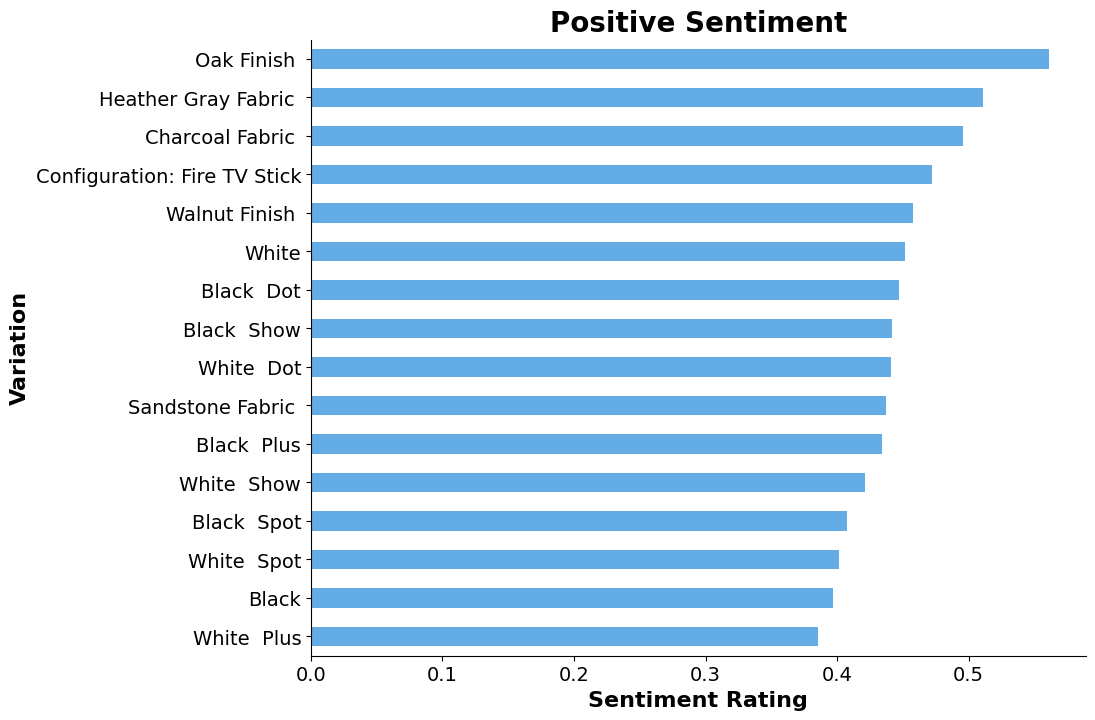

<Figure size 640x480 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Positive sentiment
color = '#63ace5'
ax = echo_vader.groupby("variation").pos.mean().sort_values().plot.barh(color=color, figsize=(10, 8))

plt.title('Positive Sentiment', fontsize=20, weight='bold')

plt.xlabel('Sentiment Rating', fontsize=16, weight='bold')
plt.xticks(fontsize=14)
plt.ylabel('Variation', fontsize=16, weight='bold')
plt.yticks(fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

fig = plt.gcf()
plt.show()
plt.draw()

#fig.savefig('positive_sentiment_horizontal_bar_plot.jpg')


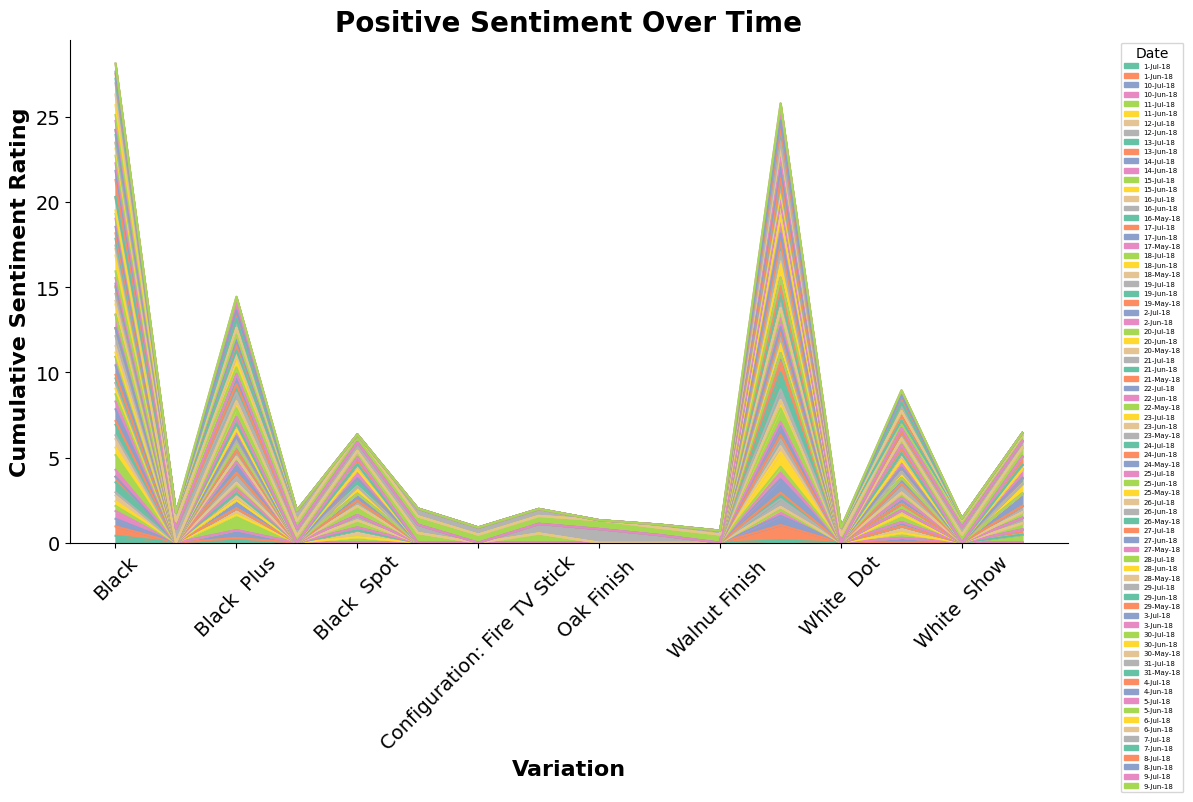

In [26]:
import seaborn as sns

# Positive sentiment
palette = sns.color_palette("Set2", n_colors=len(echo_vader['date'].unique()))
grouped_data = echo_vader.groupby(["variation", "date"]).pos.mean().unstack()

fig, ax = plt.subplots(figsize=(12, 8))
grouped_data.plot.area(stacked=True, color=palette, ax=ax)

plt.title('Positive Sentiment Over Time', fontsize=20, weight='bold')
plt.xlabel('Variation', fontsize=16, weight='bold')
plt.xticks(rotation=45, fontsize=14)
plt.ylabel('Cumulative Sentiment Rating', fontsize=16, weight='bold')
plt.yticks(fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=5)
plt.tight_layout()

fig.savefig('positive_sentiment_stacked_area_plot_different_colors.jpg')
plt.show()


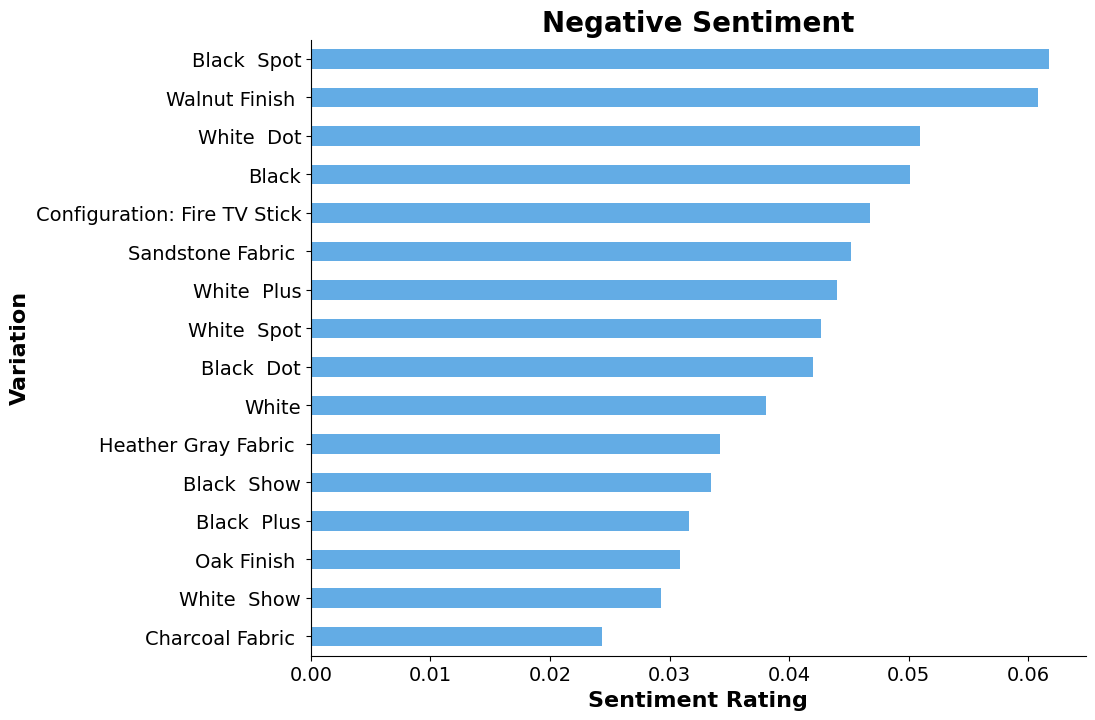

<Figure size 640x480 with 0 Axes>

In [27]:
# Positive sentiment
color = '#63ace5'
ax = echo_vader.groupby("variation").neg.mean().sort_values().plot.barh(color=color, figsize=(10, 8))

plt.title('Negative Sentiment', fontsize=20, weight='bold')

plt.xlabel('Sentiment Rating', fontsize=16, weight='bold')
plt.xticks(fontsize=14)
plt.ylabel('Variation', fontsize=16, weight='bold')
plt.yticks(fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

fig = plt.gcf()
plt.show()
plt.draw()

fig.savefig('negative_sentiment_horizontal_bar_plot.jpg')


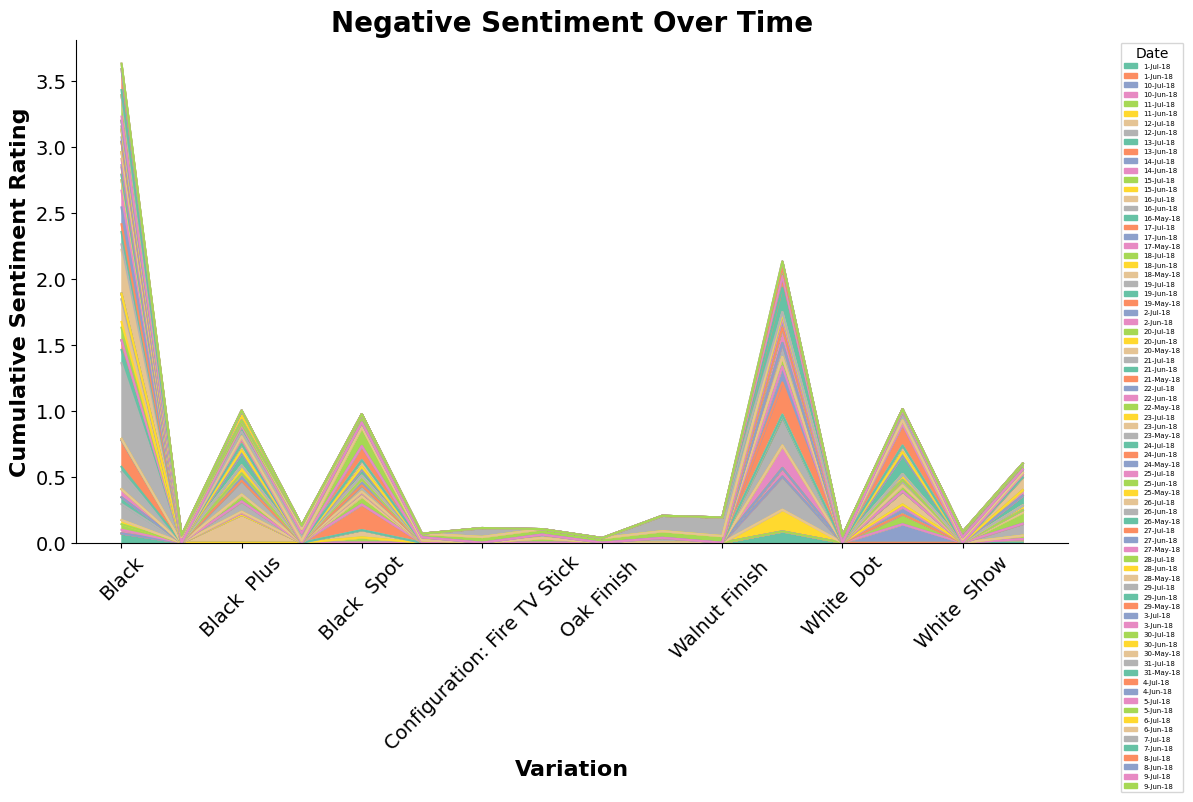

In [28]:
import seaborn as sns

# Positive sentiment
palette = sns.color_palette("Set2", n_colors=len(echo_vader['date'].unique()))
grouped_data = echo_vader.groupby(["variation", "date"]).neg.mean().unstack()

fig, ax = plt.subplots(figsize=(12, 8))
grouped_data.plot.area(stacked=True, color=palette, ax=ax)

plt.title('Negative Sentiment Over Time', fontsize=20, weight='bold')
plt.xlabel('Variation', fontsize=16, weight='bold')
plt.xticks(rotation=45, fontsize=14)
plt.ylabel('Cumulative Sentiment Rating', fontsize=16, weight='bold')
plt.yticks(fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=5)
plt.tight_layout()

fig.savefig('negative_sentiment_stacked_area_plot_different_colors.jpg')
plt.show()


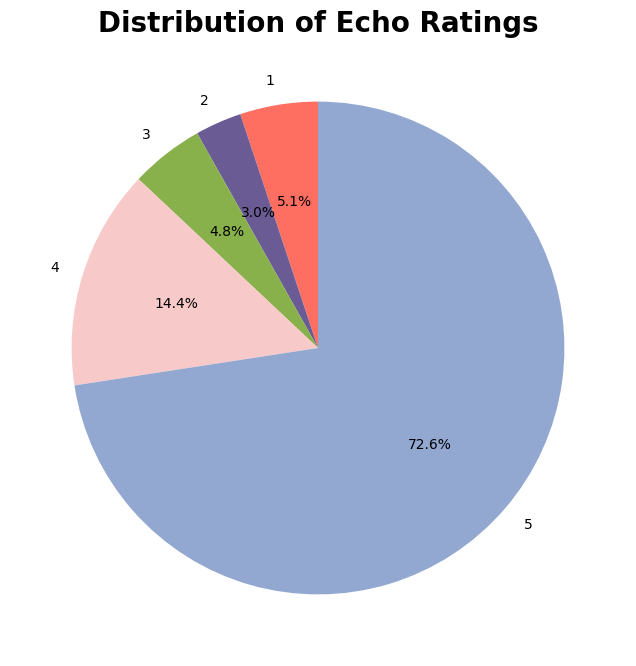

In [29]:
group = df.groupby('rating').count()
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#FFD700']

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(group['date'], labels=group.index, autopct='%1.1f%%', colors=colors, startangle=90)

plt.title('Distribution of Echo Ratings', fontsize=20, weight='bold')
plt.show()


In [30]:
#neg_alexa = df[df['SENTIMENT']=='NEGATIVE']
#pos_alexa = df[df['SENTIMENT']=='POSITIVE']

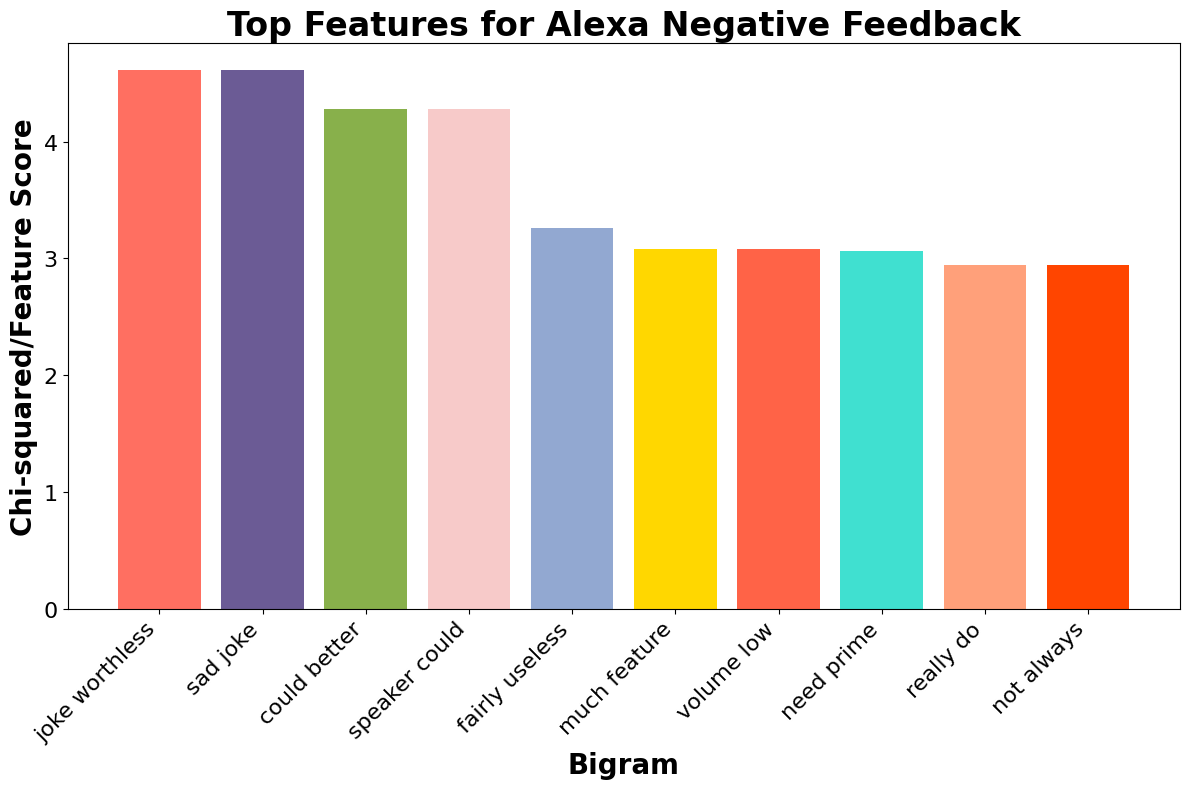

In [31]:
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer

# Select only negative sentiment reviews
neg_alexa = df[df['SENTIMENT'] == 'NEGATIVE']

# Vectorize the text using TF-IDF with bigrams, adjust parameters
tfidf_n = TfidfVectorizer(ngram_range=(2, 2), min_df=1, max_df=0.95)
X_tfidf_n = tfidf_n.fit_transform(neg_alexa['processed_reviews'])
y_n = neg_alexa['rating']

# Compute chi-squared scores
chi2score_n = chi2(X_tfidf_n, y_n)[0]

# Sort and get the top features
scores = list(zip(tfidf_n.get_feature_names_out(), chi2score_n))
chi2_n = sorted(scores, key=lambda x: x[1], reverse=True)[:10]

# Unpack features and scores
features, scores = zip(*chi2_n)

# Define a list of bright colors for each bar
bar_colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#FFD700', '#FF6347', '#40E0D0', '#FFA07A', '#FF4500']

# Create a bar chart with colorful bars
plt.figure(figsize=(12, 8))
bars = plt.bar(features, scores, color=bar_colors)

# Set plot details
plt.title('Top Features for Alexa Negative Feedback', fontsize=24, weight='bold')
plt.xlabel('Bigram', fontsize=20, weight='bold')
plt.ylabel('Chi-squared/Feature Score', fontsize=20, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)

# Add color legend
#legend_labels = [f'Feature {i + 1}' for i in range(len(features))]
#plt.legend(bars, legend_labels, loc='upper right', fontsize=12)

plt.tight_layout()

# Show the plot
plt.show()



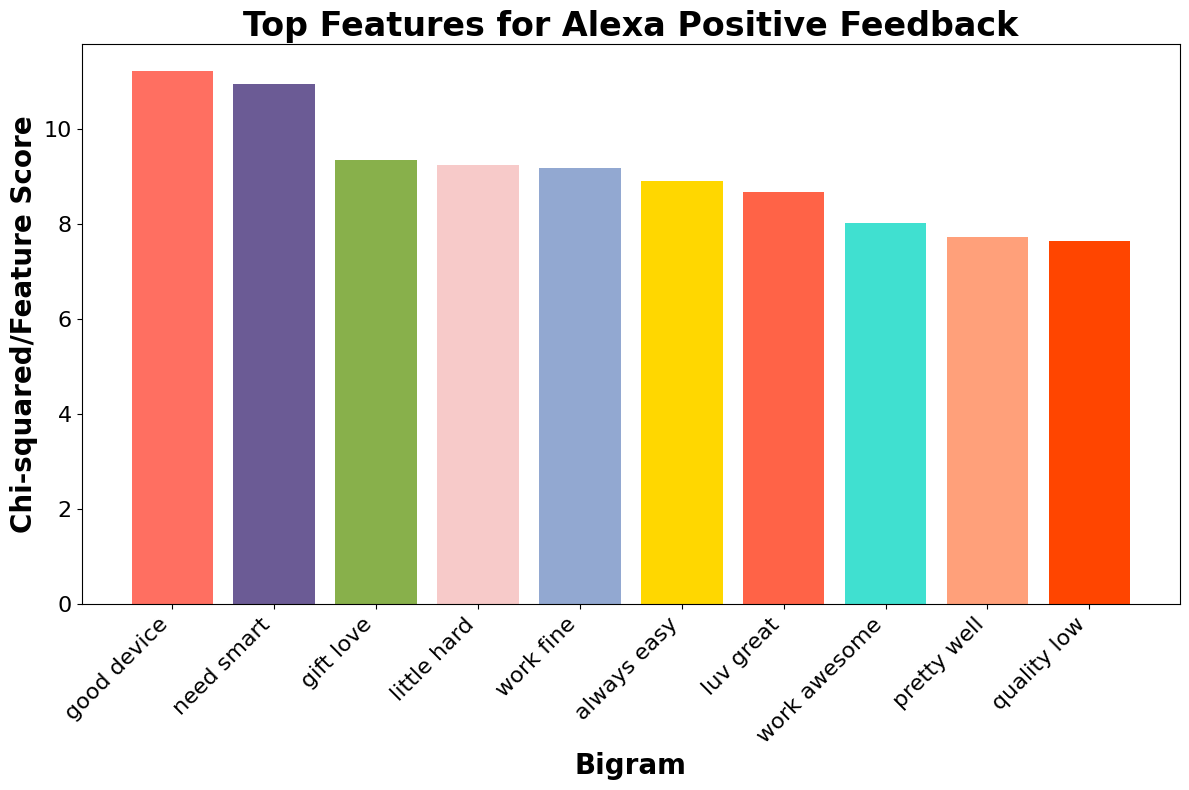

In [32]:
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer

# Select only positive sentiment reviews
pos_alexa = df[df['SENTIMENT'] == 'POSITIVE']

# Vectorize the text using TF-IDF with bigrams, adjust parameters
tfidf_p = TfidfVectorizer(ngram_range=(2, 2), min_df=1, max_df=0.95)
X_tfidf_p = tfidf_p.fit_transform(pos_alexa['processed_reviews'])
y_p = pos_alexa['rating']  # Corrected variable name

# Compute chi-squared scores
chi2score_p = chi2(X_tfidf_p, y_p)[0]

# Sort and get the top features
scores = list(zip(tfidf_p.get_feature_names_out(), chi2score_p))
chi2_p = sorted(scores, key=lambda x: x[1], reverse=True)[:10]

# Unpack features and scores
features, scores = zip(*chi2_p)

# Define a list of bright colors for each bar
bar_colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#FFD700', '#FF6347', '#40E0D0', '#FFA07A', '#FF4500']

# Create a bar chart with colorful bars
plt.figure(figsize=(12, 8))
bars = plt.bar(features, scores, color=bar_colors)

# Set plot details
plt.title('Top Features for Alexa Positive Feedback', fontsize=24, weight='bold')
plt.xlabel('Bigram', fontsize=20, weight='bold')
plt.ylabel('Chi-squared/Feature Score', fontsize=20, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)

# Add color legend
#legend_labels = [f'Feature {i + 1}' for i in range(len(features))]
#plt.legend(bars, legend_labels, loc='upper right', fontsize=12)

plt.tight_layout()

# Show the plot
plt.show()


In [33]:
print(features)

('good device', 'need smart', 'gift love', 'little hard', 'work fine', 'always easy', 'luv great', 'work awesome', 'pretty well', 'quality low')


In [34]:
df=df[df.variation!='Configuration: Fire TV Stick']
variation_counts = df['variation'].value_counts()

# Display the counts of each variation
print(variation_counts)


Black  Dot              516
Charcoal Fabric         430
Black  Plus             270
Black  Show             265
Black                   261
Black  Spot             241
White  Dot              184
Heather Gray Fabric     157
White  Spot             109
White                    91
Sandstone Fabric         90
White  Show              85
White  Plus              78
Oak Finish               14
Walnut Finish             9
Name: variation, dtype: int64


In [35]:
df['model']=np.where(df.variation.str.contains('Charcoal Fabric|Heather Gray Fabric|Sandstone Fabric|Oak Finish |Walnut Finish'),'echo',df['variation'])
df['model']=np.where(df.variation.str.contains('Black  Dot|White  Dot|Black|White'), 'echo dot', df['model'])
df['model']=np.where(df.variation.str.contains('Black  Show|White  Show'), 'echo show', df['model'])
df['model']=np.where(df.variation.str.contains('Black  Plus|White  Plus'), 'echo plus', df['model'])
df['model']=np.where(df.variation.str.contains('Black  Spot|White  Spot'), 'echo spot', df['model'])
df['model'].value_counts()


<ipython-input-35-f7c310f8ed38>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-f7c310f8ed38>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-f7c310f8ed38>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-35-f7c310f

echo dot     1052
echo          700
echo spot     350
echo show     350
echo plus     348
Name: model, dtype: int64

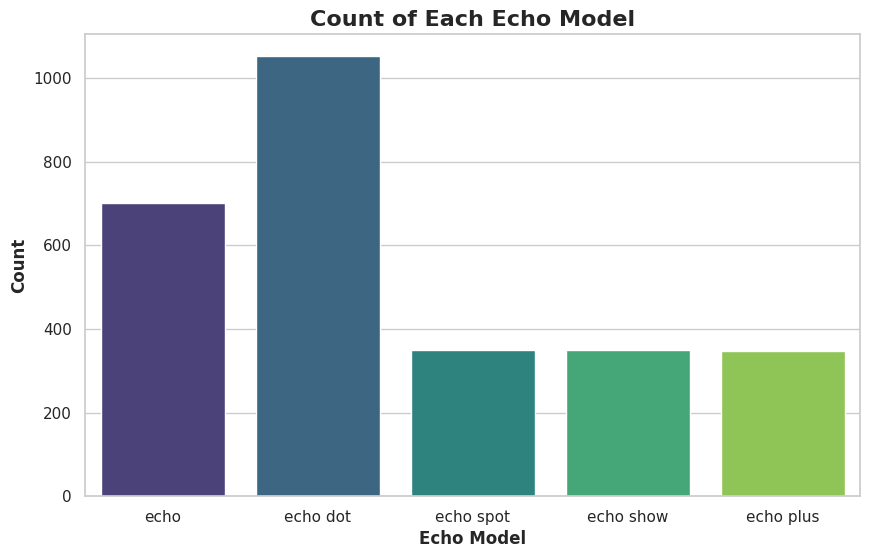

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='model', data=df, palette='viridis')

# Set plot details
ax.set_title('Count of Each Echo Model', fontsize=16, weight='bold')
ax.set_xlabel('Echo Model', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')

# Show the plot
plt.show()


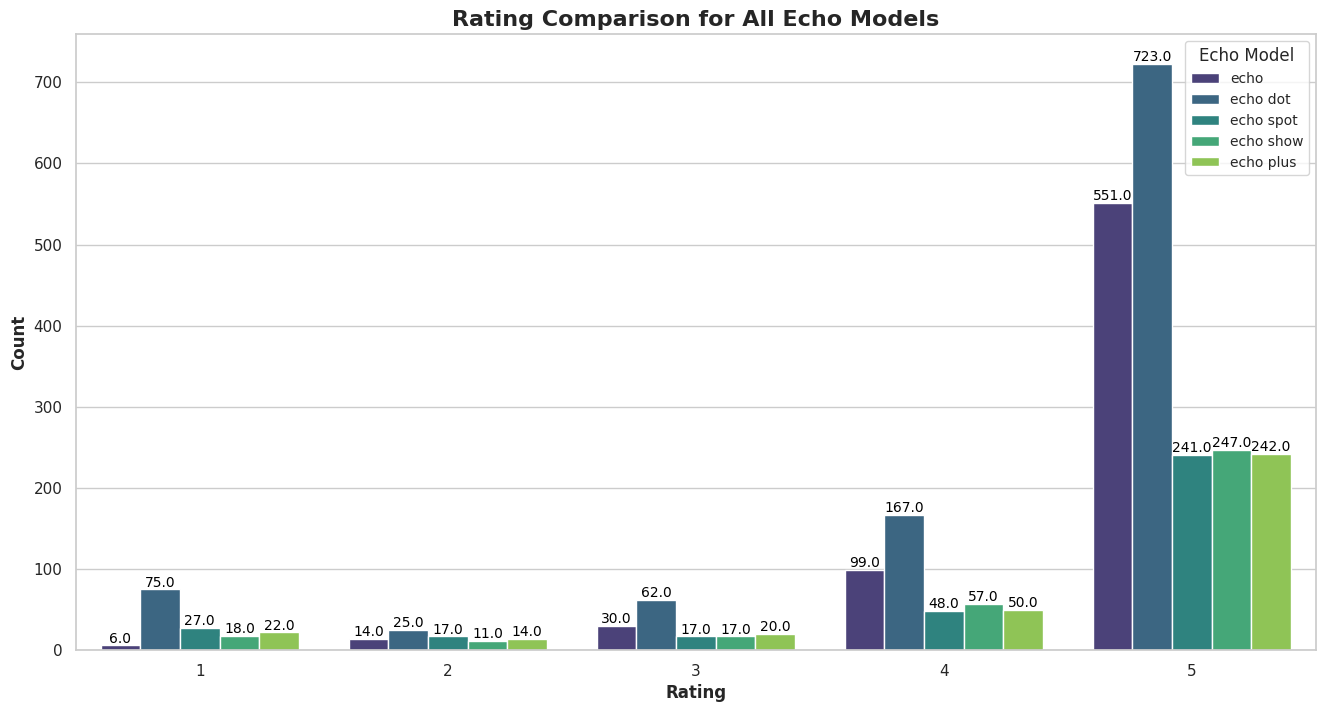

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter DataFrame for specified Echo models
selected_models = ['echo', 'echo dot', 'echo spot', 'echo show', 'echo plus']
filtered_df = df[df['model'].isin(selected_models)]

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='rating', hue='model', data=filtered_df, palette='viridis')

# Set plot details
ax.set_title('Rating Comparison for All Echo Models', fontsize=16, weight='bold')
ax.set_xlabel('Rating', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
ax.legend(title='Echo Model', title_fontsize='12', fontsize='10', loc='upper right')

# Add count annotations on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()


In [38]:
df.head()

rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  Review_Length  \
0                                      Love my Echo!         1              3   
1                                          Loved it!         1              2   
2  Sometimes while playing a game, you can answer...         1             38   
3  I have had a lot of fun with this thing. My 4 ...         1             34   
4                                              Music         1              1   

                                   processed_reviews SENTIMENT  \
0                                          love echo  POSITIVE   
1                                               love  POSITIVE   
2  sometimes play game answer question correctly ...  POSITIVE   
3  lot fun thing 4 yr old learn dinosaur control ...  POSITIVE   
4                                              music  POSITIVE   

                                    sentiment_scores model  
0  {'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'comp...  echo  
1  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...  echo  
2  {'neg': 0.141, 'neu': 0.636, 'pos': 0.223, 'co...  echo  
3  {'neg': 0.0, 'neu': 0.436, 'pos': 0.564, 'comp...  echo  
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  echo

In [39]:
def sentimentScore(sentences):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        print(str(vs))
        results.append(vs)
    return results

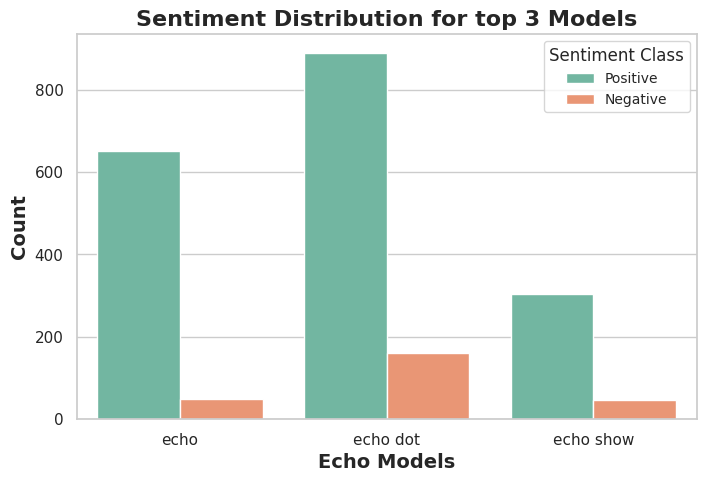

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the DataFrame into three classes
df_echo = df[df['model'] == 'echo'].copy()
df_echo_dot = df[df['model'] == 'echo dot'].copy()
df_echo_show = df[df['model'] == 'echo show'].copy()

# Function to classify sentiments
def classify_sentiment(sentiment):
    if sentiment == 'POSITIVE':
        return 'Positive'
    elif sentiment == 'NEGATIVE':
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create a new column 'Sentiment_Class'
df_echo['Sentiment_Class'] = df_echo['SENTIMENT'].apply(classify_sentiment)
df_echo_dot['Sentiment_Class'] = df_echo_dot['SENTIMENT'].apply(classify_sentiment)
df_echo_show['Sentiment_Class'] = df_echo_show['SENTIMENT'].apply(classify_sentiment)

# Combine the DataFrames for plotting
df_combined = pd.concat([df_echo, df_echo_dot, df_echo_show])

# Set the style for the plot
sns.set(style="whitegrid")

# Create a grouped bar chart
plt.figure(figsize=(8, 5))
sns.countplot(x='model', hue='Sentiment_Class', data=df_combined, palette='Set2')

# Set plot details
plt.title('Sentiment Distribution for top 3 Models', fontsize=16, weight='bold')
plt.xlabel('Echo Models', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')
plt.legend(title='Sentiment Class', title_fontsize='12', fontsize='10', loc='upper right')

# Show the plot
plt.show()


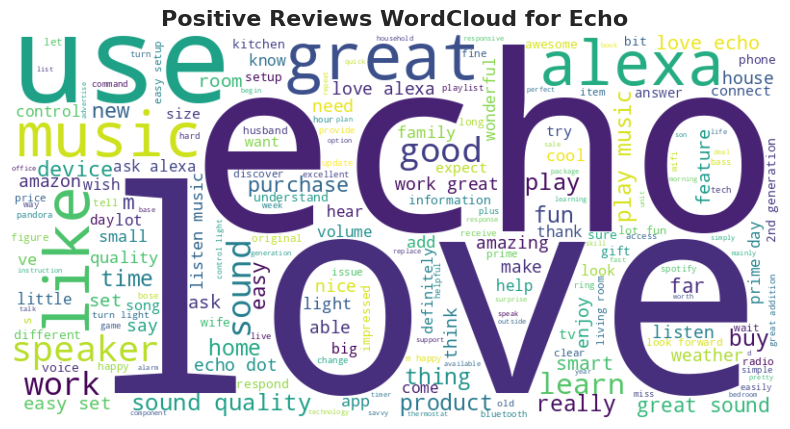

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Function to generate word cloud
def generate_word_cloud(text, title, colormap='viridis'):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormap,
                          stopwords=ENGLISH_STOP_WORDS).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16, weight='bold')
    plt.show()

# Separate positive and negative reviews
positive_reviews = ' '.join(df[(df['SENTIMENT'] == 'POSITIVE')  & (df['model'] == 'echo')]['processed_reviews'])

# Generate word clouds
generate_word_cloud(positive_reviews, 'Positive Reviews WordCloud for Echo')



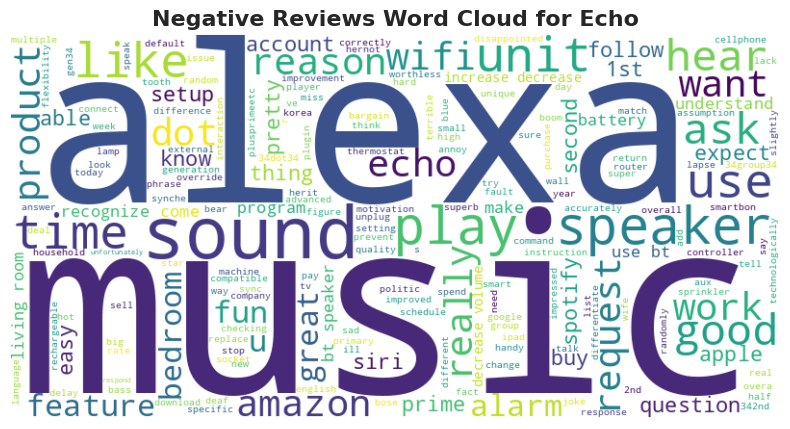

In [42]:
negative_reviews = ' '.join(df[(df['SENTIMENT'] == 'NEGATIVE') & (df['model'] == 'echo')]['processed_reviews'])
generate_word_cloud(negative_reviews, 'Negative Reviews Word Cloud for Echo')

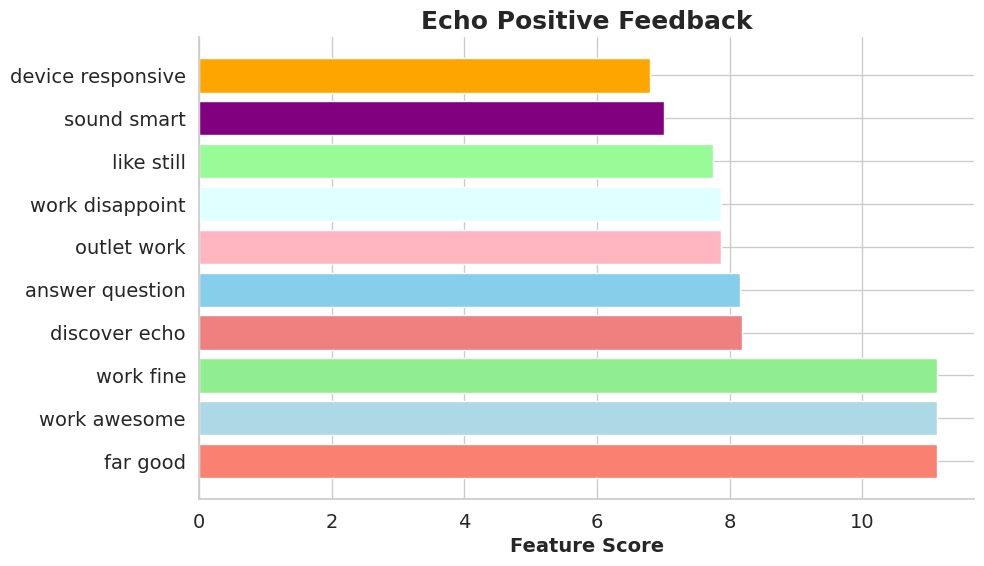

In [43]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Select only positive sentiment reviews for Echo
pos_echo = df[(df['SENTIMENT'] == 'POSITIVE') & (df['model'] == 'echo')]

# Vectorize the text using TF-IDF with bigrams
tfidf_n = TfidfVectorizer(ngram_range=(2, 2), min_df=1, max_df=0.95)
X_tfidf_n = tfidf_n.fit_transform(pos_echo['processed_reviews'])
y_n = pos_echo['rating']

# Compute chi-squared scores
chi2score_n = chi2(X_tfidf_n, y_n)[0]

# Get feature names from TfidfVectorizer
feature_names = tfidf_n.get_feature_names_out()

# Zip feature names with corresponding chi2 scores
scores = list(zip(feature_names, chi2score_n))

# Sort by chi2 scores
chi2_n = sorted(scores, key=lambda x: x[1], reverse=True)

# Take the top 10 features
topchi2_n = list(zip(*chi2_n[:10]))

'''# Print the top feature values and scores
for feature, score in zip(topchi2_n[0], topchi2_n[1]):
    print(f"Feature: {feature}, Score: {score}")'''

# Plot the bar chart
x = range(len(topchi2_n[1]))
bar_colors = ['salmon', 'lightblue', 'lightgreen', 'lightcoral', 'skyblue', 'lightpink', 'lightcyan', 'palegreen', 'purple', 'orange']

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(x, topchi2_n[1], alpha=1, color=bar_colors)

plt.title('Echo Positive Feedback', fontsize=18, weight='bold')

# x-axis
plt.xlabel("Feature Score", fontsize=14, weight='bold')
plt.xticks(fontsize=14)

# y-axis
labels = topchi2_n[0]
plt.yticks(x, labels, fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

fig = plt.gcf()
plt.show()


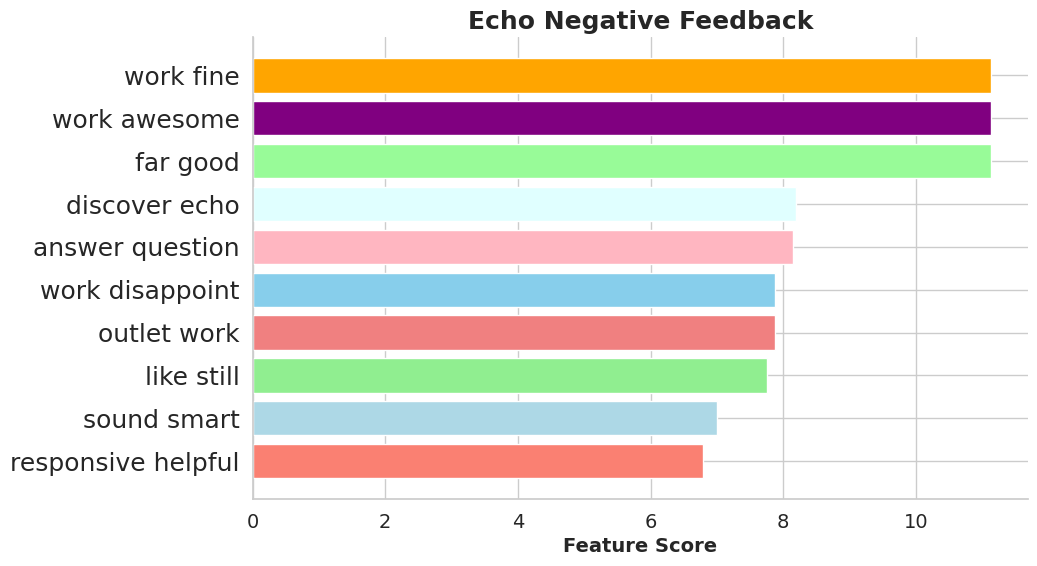

In [44]:

# Sort and get the top features
scores = list(zip(tfidf_n.get_feature_names_out(), chi2score_n))
chi2_n = sorted(scores, key=lambda x: x[1])
topchi2_n = list(zip(*chi2_n[-10:]))

# Define different colors for each bar
bar_colors = ['salmon', 'lightblue', 'lightgreen', 'lightcoral', 'skyblue', 'lightpink', 'lightcyan', 'palegreen', 'purple', 'orange']

# Adjust the figsize to your desired size (e.g., (12, 6))
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(range(len(topchi2_n[1])), topchi2_n[1], align='center', alpha=1, color=bar_colors)

plt.title('Echo Negative Feedback', fontsize=18, weight='bold')

# x-axis
plt.xlabel("Feature Score", fontsize=14, weight='bold')
plt.xticks(fontsize=14)

# y-axis
labels = topchi2_n[0]
plt.yticks(range(len(topchi2_n[1])), labels, fontsize=18)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.show()


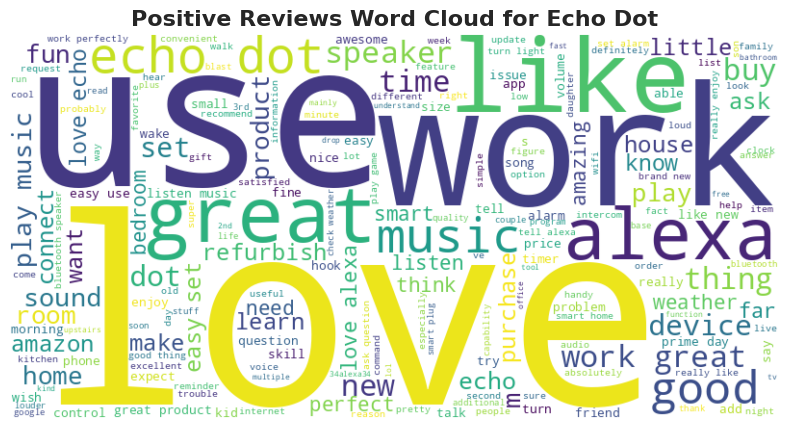

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Function to generate word cloud
def generate_word_cloud(text, title, colormap='viridis'):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormap,
                          stopwords=ENGLISH_STOP_WORDS).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16, weight='bold')
    plt.show()

# Separate positive and negative reviews for "echo dot"
echo_dot_positive_reviews = ' '.join(df[(df['SENTIMENT'] == 'POSITIVE') & (df['model'] == 'echo dot')]['processed_reviews'])

# Generate word cloud for "echo dot"
generate_word_cloud(echo_dot_positive_reviews, 'Positive Reviews Word Cloud for Echo Dot')


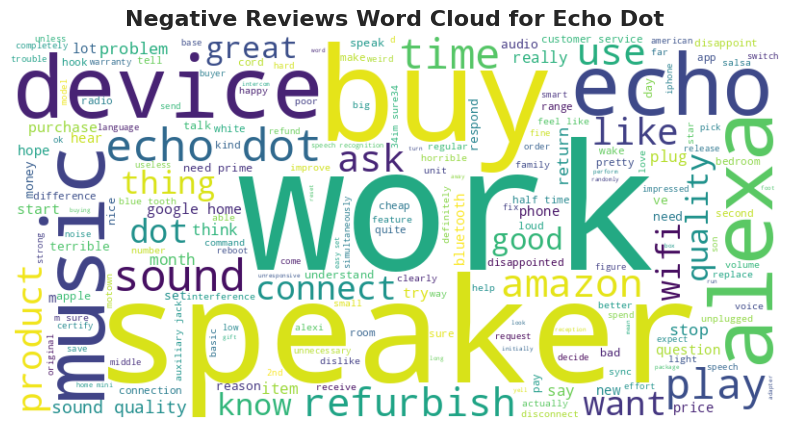

In [46]:
negative_reviews = ' '.join(df[(df['SENTIMENT'] == 'NEGATIVE') & (df['model'] == 'echo dot')]['processed_reviews'])
generate_word_cloud(negative_reviews, 'Negative Reviews Word Cloud for Echo Dot')

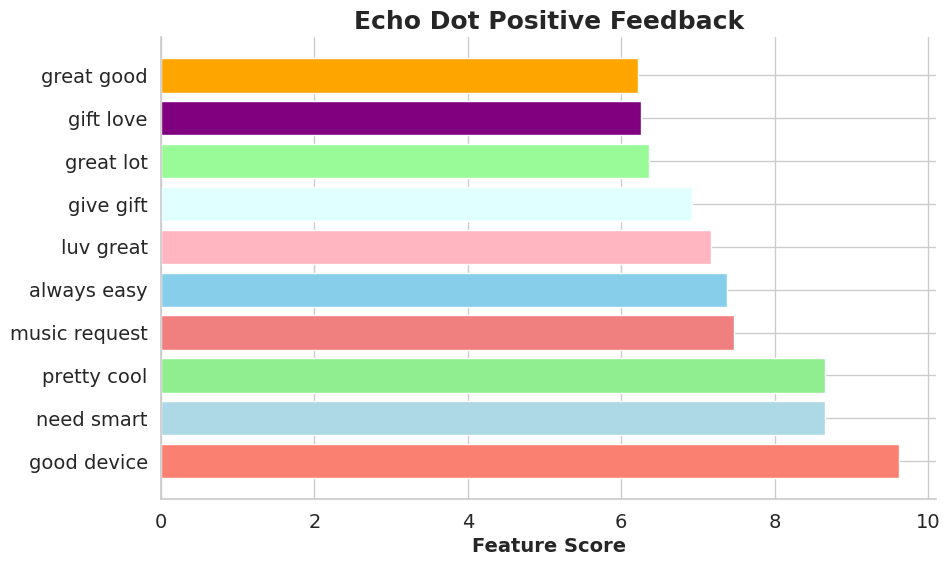

In [47]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Select only positive sentiment reviews for Echo
pos_echo = df[(df['SENTIMENT'] == 'POSITIVE') & (df['model'] == 'echo dot')]

# Vectorize the text using TF-IDF with bigrams
tfidf_n = TfidfVectorizer(ngram_range=(2, 2), min_df=1, max_df=0.95)
X_tfidf_n = tfidf_n.fit_transform(pos_echo['processed_reviews'])
y_n = pos_echo['rating']

# Compute chi-squared scores
chi2score_n = chi2(X_tfidf_n, y_n)[0]

# Get feature names from TfidfVectorizer
feature_names = tfidf_n.get_feature_names_out()

# Zip feature names with corresponding chi2 scores
scores = list(zip(feature_names, chi2score_n))

# Sort by chi2 scores
chi2_n = sorted(scores, key=lambda x: x[1], reverse=True)

# Take the top 10 features
topchi2_n = list(zip(*chi2_n[:10]))

'''# Print the top feature values and scores
for feature, score in zip(topchi2_n[0], topchi2_n[1]):
    print(f"Feature: {feature}, Score: {score}")'''

# Plot the bar chart
x = range(len(topchi2_n[1]))
bar_colors = ['salmon', 'lightblue', 'lightgreen', 'lightcoral', 'skyblue', 'lightpink', 'lightcyan', 'palegreen', 'purple', 'orange']

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(x, topchi2_n[1], alpha=1, color=bar_colors)

plt.title('Echo Dot Positive Feedback', fontsize=18, weight='bold')

# x-axis
plt.xlabel("Feature Score", fontsize=14, weight='bold')
plt.xticks(fontsize=14)

# y-axis
labels = topchi2_n[0]
plt.yticks(x, labels, fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

fig = plt.gcf()
plt.show()


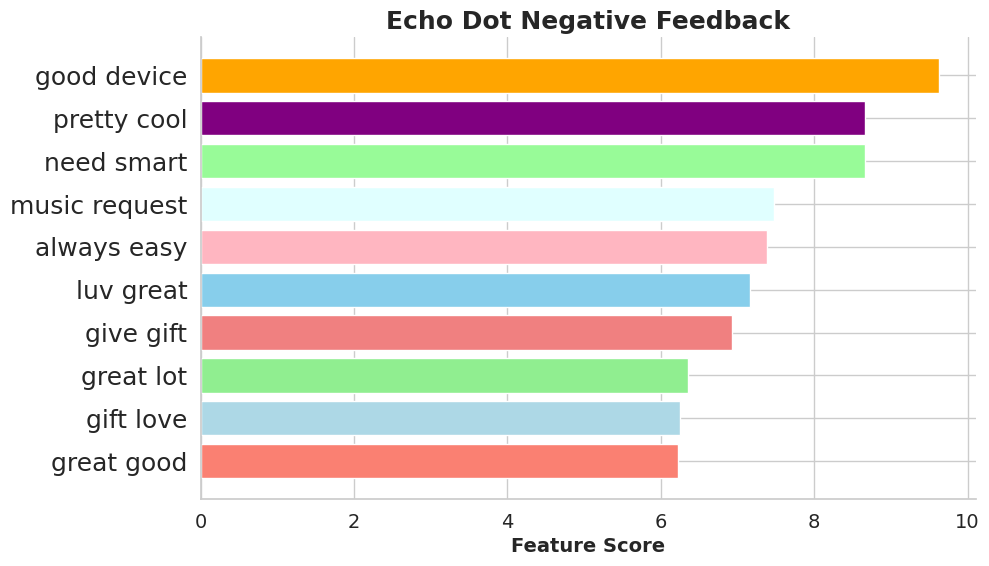

In [48]:
# Sort and get the top features for echo dot negative feedbacks
scores_dot_negative = list(zip(tfidf_n.get_feature_names_out(), chi2score_n))
chi2_dot_negative = sorted(scores_dot_negative, key=lambda x: x[1])
topchi2_dot_negative = list(zip(*chi2_dot_negative[-10:]))

# Define different colors for each bar
bar_colors = ['salmon', 'lightblue', 'lightgreen', 'lightcoral', 'skyblue', 'lightpink', 'lightcyan', 'palegreen', 'purple', 'orange']

# Adjust the figsize to your desired size (e.g., (12, 6))
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(range(len(topchi2_dot_negative[1])), topchi2_dot_negative[1], align='center', alpha=1, color=bar_colors)

plt.title('Echo Dot Negative Feedback', fontsize=18, weight='bold')

# x-axis
plt.xlabel("Feature Score", fontsize=14, weight='bold')
plt.xticks(fontsize=14)

# y-axis
labels = topchi2_dot_negative[0]
plt.yticks(range(len(topchi2_dot_negative[1])), labels, fontsize=18)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.show()


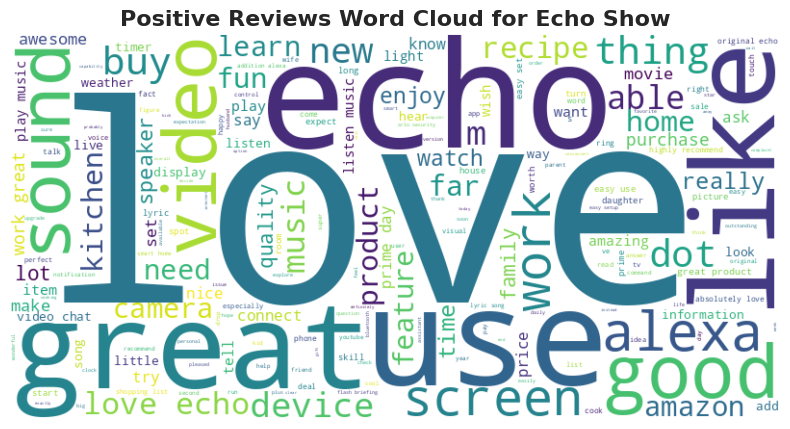

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Function to generate word cloud
def generate_word_cloud(text, title, colormap='viridis'):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormap,
                          stopwords=ENGLISH_STOP_WORDS).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16, weight='bold')
    plt.show()

# Separate positive and negative reviews for "Echo Show"
echo_show_positive_reviews = ' '.join(df[(df['SENTIMENT'] == 'POSITIVE') & (df['model'] == 'echo show')]['processed_reviews'])

# Generate word cloud for "Echo Show"
generate_word_cloud(echo_show_positive_reviews, 'Positive Reviews Word Cloud for Echo Show')


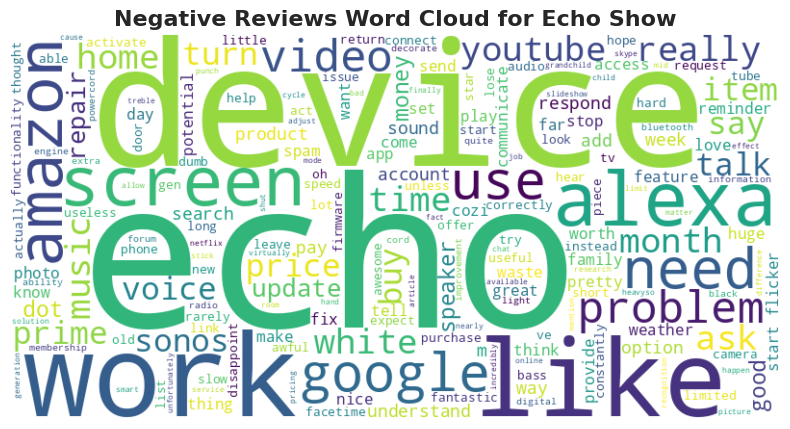

In [50]:
negative_reviews = ' '.join(df[(df['SENTIMENT'] == 'NEGATIVE') & (df['model'] == 'echo show')]['processed_reviews'])
generate_word_cloud(negative_reviews, 'Negative Reviews Word Cloud for Echo Show')

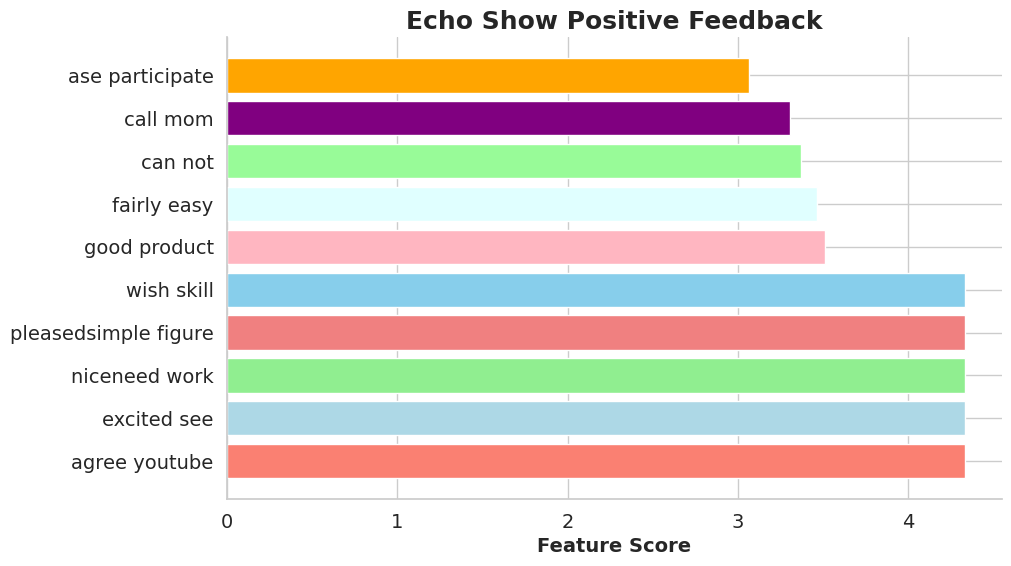

In [51]:
# Select only positive sentiment reviews for Echo Show
pos_echo_show = df[(df['SENTIMENT'] == 'POSITIVE') & (df['model'] == 'echo show')]

# Vectorize the text using TF-IDF with bigrams
tfidf_echo_show = TfidfVectorizer(ngram_range=(2, 2), min_df=1, max_df=0.95)
X_tfidf_echo_show = tfidf_echo_show.fit_transform(pos_echo_show['processed_reviews'])
y_echo_show = pos_echo_show['rating']

# Compute chi-squared scores
chi2score_echo_show = chi2(X_tfidf_echo_show, y_echo_show)[0]

# Get feature names from TfidfVectorizer
feature_names_echo_show = tfidf_echo_show.get_feature_names_out()

# Zip feature names with corresponding chi2 scores
scores_echo_show = list(zip(feature_names_echo_show, chi2score_echo_show))

# Sort by chi2 scores
chi2_echo_show = sorted(scores_echo_show, key=lambda x: x[1], reverse=True)

# Take the top 10 features
topchi2_echo_show = list(zip(*chi2_echo_show[:10]))

# Plot the bar chart for Echo Show
x_echo_show = range(len(topchi2_echo_show[1]))
bar_colors_echo_show = ['salmon', 'lightblue', 'lightgreen', 'lightcoral', 'skyblue', 'lightpink', 'lightcyan', 'palegreen', 'purple', 'orange']

fig_echo_show, ax_echo_show = plt.subplots(figsize=(10, 6))
ax_echo_show.barh(x_echo_show, topchi2_echo_show[1], alpha=1, color=bar_colors_echo_show)

plt.title('Echo Show Positive Feedback', fontsize=18, weight='bold')

# x-axis
plt.xlabel("Feature Score", fontsize=14, weight='bold')
plt.xticks(fontsize=14)

# y-axis
labels_echo_show = topchi2_echo_show[0]
plt.yticks(x_echo_show, labels_echo_show, fontsize=14)

ax_echo_show.spines['right'].set_visible(False)
ax_echo_show.spines['top'].set_visible(False)
ax_echo_show.spines['bottom'].set_visible(True)
ax_echo_show.spines['left'].set_visible(True)

fig_echo_show = plt.gcf()
plt.show()


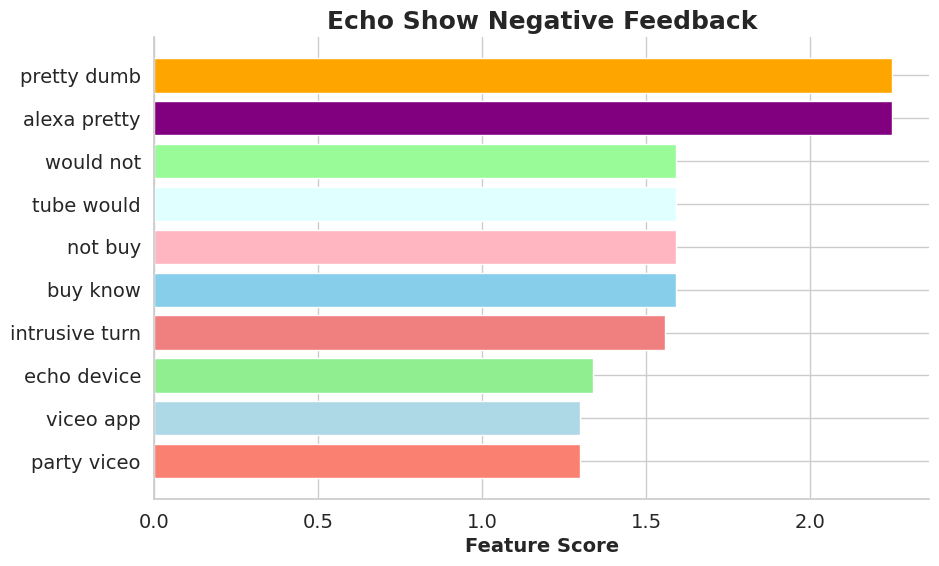

In [52]:
# Select only negative sentiment reviews for Echo Show
neg_echo_show = df[(df['SENTIMENT'] == 'NEGATIVE') & (df['model'] == 'echo show')]

# Vectorize the text using TF-IDF with bigrams
tfidf_echo_show_negative = TfidfVectorizer(ngram_range=(2, 2), min_df=1, max_df=0.95)
X_tfidf_echo_show_negative = tfidf_echo_show_negative.fit_transform(neg_echo_show['processed_reviews'])
y_echo_show_negative = neg_echo_show['rating']

# Compute chi-squared scores
chi2score_echo_show_negative = chi2(X_tfidf_echo_show_negative, y_echo_show_negative)[0]

# Get feature names from TfidfVectorizer
feature_names_echo_show_negative = tfidf_echo_show_negative.get_feature_names_out()

# Zip feature names with corresponding chi2 scores
scores_echo_show_negative = list(zip(feature_names_echo_show_negative, chi2score_echo_show_negative))

# Sort by chi2 scores
chi2_echo_show_negative = sorted(scores_echo_show_negative, key=lambda x: x[1])

# Take the top 10 features
topchi2_echo_show_negative = list(zip(*chi2_echo_show_negative[-10:]))

# Plot the bar chart for Echo Show negative feedbacks
x_echo_show_negative = range(len(topchi2_echo_show_negative[1]))
bar_colors_echo_show_negative = ['salmon', 'lightblue', 'lightgreen', 'lightcoral', 'skyblue', 'lightpink', 'lightcyan', 'palegreen', 'purple', 'orange']

fig_echo_show_negative, ax_echo_show_negative = plt.subplots(figsize=(10, 6))
ax_echo_show_negative.barh(x_echo_show_negative, topchi2_echo_show_negative[1], alpha=1, color=bar_colors_echo_show_negative)

plt.title('Echo Show Negative Feedback', fontsize=18, weight='bold')

# x-axis
plt.xlabel("Feature Score", fontsize=14, weight='bold')
plt.xticks(fontsize=14)

# y-axis
labels_echo_show_negative = topchi2_echo_show_negative[0]
plt.yticks(x_echo_show_negative, labels_echo_show_negative, fontsize=14)

ax_echo_show_negative.spines['right'].set_visible(False)
ax_echo_show_negative.spines['top'].set_visible(False)
ax_echo_show_negative.spines['bottom'].set_visible(True)
ax_echo_show_negative.spines['left'].set_visible(True)

fig_echo_show_negative = plt.gcf()
plt.show()


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

X = df['processed_reviews']
y = df['SENTIMENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 2), min_df=1, max_df=0.95)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8696428571428572
